# 7136COMP - Project Dissertation

## AI assistant coach for analysing football players and teams using Machine Learning

### Defensive Dataset:

In [1]:
# Common imports
import sklearn; print("version: ",sklearn.__version__) # to check the version

import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

# To plot figures
import matplotlib.pyplot as plt
# tells jupyter to set up Matplotlib so it uses Jupyter's own backend
%matplotlib inline 

# To save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=400):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

version:  0.24.2


## Dataset

In [2]:
# importing the dataset
def_data = pd.read_csv("./LFC_Data/4_Liv_DefActions_Fix_merge.csv")

In [3]:
# To take a quick look at the data structure
def_data.head()

,Season,Player,Nation,Pos,Age,90s,Tkl,TklW,Def 3rd,Mid 3rd,...,Press Mid 3rd,Press Att 3rd,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,15,13,3,5,...,167,202,17,0,0,17,13,28,3,0
1,2017,Roberto Firmino,br BRA,FW,25,30.7,62,48,12,35,...,373,309,41,2,1,39,25,87,10,0
2,2017,Sadio Mané,sn SEN,FW,25,24.3,33,25,9,15,...,136,133,14,1,0,13,19,52,6,0
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,38,30,16,18,...,192,72,22,2,0,20,42,80,28,0
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,48,32,15,26,...,275,60,44,1,0,43,38,86,55,0


In [4]:
# To show the meaning of the features/columns
data_dict = pd.read_csv("./LFC_Data/4_Data_dictionary.csv")
data_dict

,Column Name,Description
0,Season,Year where the data belongs to
1,Player,Name of the player
2,Nation,Nationality of the player
3,Pos,Position of the player
4,Age,Age at the season start for league play
5,90s,Minutes played divided by 90
6,Tkl,Number of players tackled
7,TklW,Tackles in which the tackler's team won posses...
8,Def 3rd,Tackles in defensive 1/3
9,Mid 3rd,Tackles in middle 1/3


In [5]:
# To check the concise summary of the features
def_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Season         129 non-null    int64  
 1   Player         129 non-null    object 
 2   Nation         129 non-null    object 
 3   Pos            129 non-null    object 
 4   Age            129 non-null    int64  
 5   90s            129 non-null    float64
 6   Tkl            129 non-null    int64  
 7   TklW           129 non-null    int64  
 8   Def 3rd        129 non-null    int64  
 9   Mid 3rd        129 non-null    int64  
 10  Att 3rd        129 non-null    int64  
 11  Drb_Tkl        129 non-null    int64  
 12  Att            129 non-null    int64  
 13  Tkl%           119 non-null    float64
 14  Past           129 non-null    int64  
 15  Press          129 non-null    int64  
 16  Succ           129 non-null    int64  
 17  Press%         125 non-null    float64
 18  Press Def 

In [6]:
# To generate the descriptive statistics 
def_data.describe()

,Season,Age,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Drb_Tkl,Att,...,Press Mid 3rd,Press Att 3rd,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,2019.038760,25.294574,16.201550,23.868217,14.922481,9.496124,10.170543,4.201550,7.868217,22.108527,...,94.224806,63.209302,18.937984,3.178295,0.108527,15.759690,16.658915,40.527132,30.596899,0.449612
std,1.443753,3.941770,12.154294,21.631639,13.823447,10.049972,10.032077,4.521442,8.488393,20.654993,...,88.150284,80.817955,16.701306,4.281956,0.336348,14.600286,17.165325,36.398420,46.706617,0.983943
min,2017.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,23.000000,4.200000,4.000000,2.000000,1.000000,2.000000,0.000000,1.000000,3.000000,...,18.000000,6.000000,3.000000,0.000000,0.000000,3.000000,2.000000,6.000000,2.000000,0.000000
50%,2019.000000,26.000000,14.000000,19.000000,11.000000,6.000000,7.000000,3.000000,5.000000,17.000000,...,70.000000,31.000000,15.000000,2.000000,0.000000,12.000000,12.000000,35.000000,8.000000,0.000000
75%,2020.000000,28.000000,28.200000,39.000000,25.000000,15.000000,16.000000,7.000000,12.000000,35.000000,...,161.000000,86.000000,32.000000,4.000000,0.000000,25.000000,25.000000,67.000000,43.000000,1.000000
max,2021.000000,35.000000,38.000000,83.000000,53.000000,50.000000,40.000000,17.000000,34.000000,85.000000,...,373.000000,343.000000,62.000000,22.000000,2.000000,53.000000,76.000000,131.000000,259.000000,7.000000


In [7]:
# To check the distribution of the data
def_data["Season"].value_counts()

2020    28
2017    27
2021    27
2019    24
2018    23
Name: Season, dtype: int64

In [8]:
# To check the null value
def_data.isnull().sum()

Season            0
Player            0
Nation            0
Pos               0
Age               0
90s               0
Tkl               0
TklW              0
Def 3rd           0
Mid 3rd           0
Att 3rd           0
Drb_Tkl           0
Att               0
Tkl%             10
Past              0
Press             0
Succ              0
Press%            4
Press Def 3rd     0
Press Mid 3rd     0
Press Att 3rd     0
Blocks            0
Sh                0
ShSv              0
Pass              0
Int               0
Tkl+Int           0
Clr               0
Err               0
dtype: int64

# Data Preprocessing
## EDA and Data Cleaning

In [9]:
# To check the shape of the data
def_data.shape

(129, 29)

In [10]:
# To fill the null values with 0 because player were not playing the matches
new_def_data = def_data.copy()

new_def_data.fillna(value=0, inplace=True)

In [11]:
# To check the null data again
new_def_data.isnull().sum()

Season           0
Player           0
Nation           0
Pos              0
Age              0
90s              0
Tkl              0
TklW             0
Def 3rd          0
Mid 3rd          0
Att 3rd          0
Drb_Tkl          0
Att              0
Tkl%             0
Past             0
Press            0
Succ             0
Press%           0
Press Def 3rd    0
Press Mid 3rd    0
Press Att 3rd    0
Blocks           0
Sh               0
ShSv             0
Pass             0
Int              0
Tkl+Int          0
Clr              0
Err              0
dtype: int64

In [12]:
# To check the info of new_def_data
new_def_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Season         129 non-null    int64  
 1   Player         129 non-null    object 
 2   Nation         129 non-null    object 
 3   Pos            129 non-null    object 
 4   Age            129 non-null    int64  
 5   90s            129 non-null    float64
 6   Tkl            129 non-null    int64  
 7   TklW           129 non-null    int64  
 8   Def 3rd        129 non-null    int64  
 9   Mid 3rd        129 non-null    int64  
 10  Att 3rd        129 non-null    int64  
 11  Drb_Tkl        129 non-null    int64  
 12  Att            129 non-null    int64  
 13  Tkl%           129 non-null    float64
 14  Past           129 non-null    int64  
 15  Press          129 non-null    int64  
 16  Succ           129 non-null    int64  
 17  Press%         129 non-null    float64
 18  Press Def 

Saving figure 04_hist_features


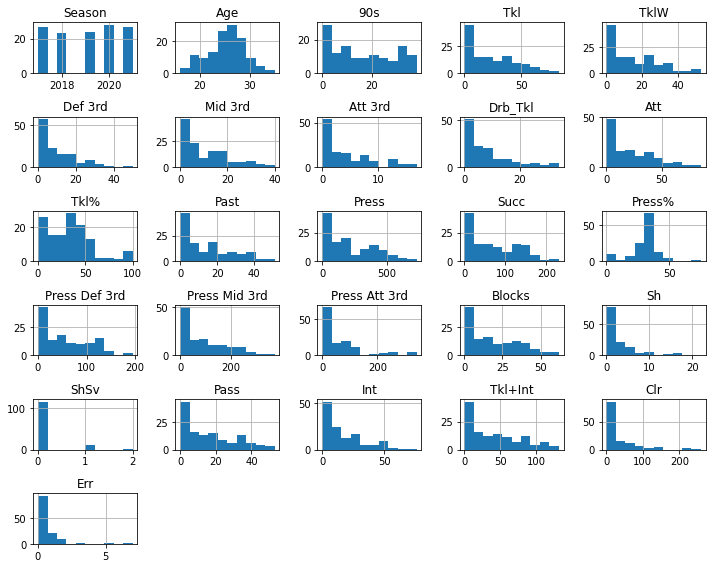

In [13]:
# To make histogram of all the features to analyse it
new_def_data.hist(figsize=(10,8))
save_fig("04_hist_features")
plt.show()

The above graph shows the distribution of all the features.

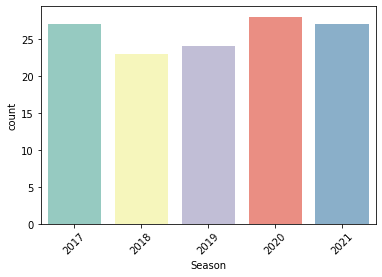

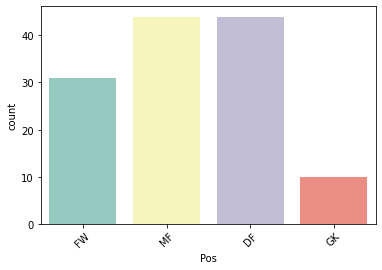

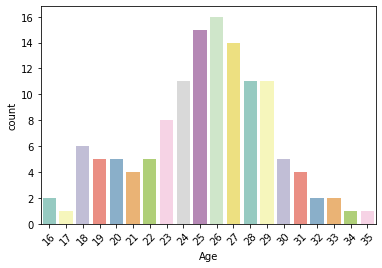

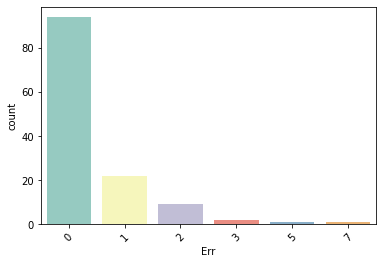

In [14]:
# To loop through features to see the countplot of the features 
features = ['Season','Pos','Age','Err']
for f in features:
    sns.countplot(data=new_def_data, x=f, palette='Set3')
    plt.xticks(rotation=45)
    plt.show()

<AxesSubplot:xlabel='Pos', ylabel='Tkl'>

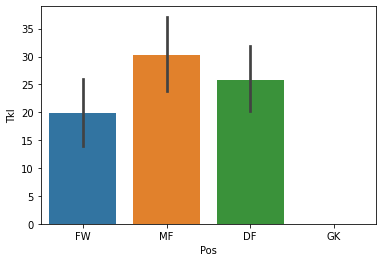

In [15]:
# To see against which player position tackles the most
sns.barplot(data=new_def_data, x='Pos', y='Tkl')

According to the above barplot, the MidFielder tackles the most followed by Defenders and then Forwards.

<AxesSubplot:xlabel='Age', ylabel='Press'>

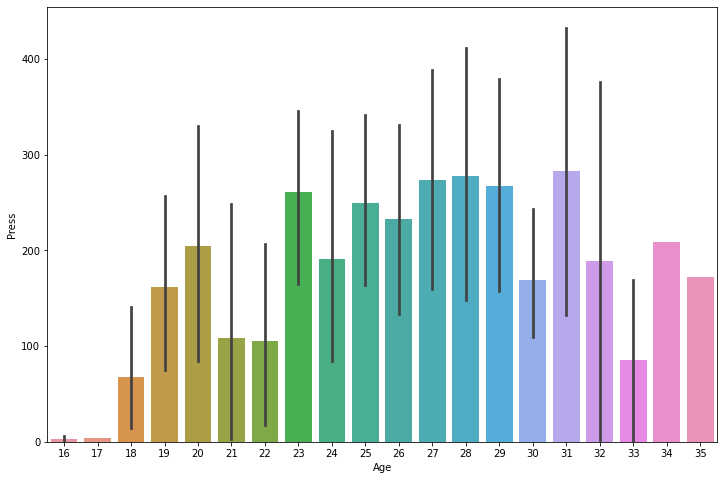

In [16]:
# To see which age group pressess the most during the matches
plt.figure(figsize=(12,8))
sns.barplot(data=new_def_data, x='Age', y='Press')

In the last five seasons, the team has given up the most goals against Manchester City and then Aston Villa. This means that the team needs to try new strategies or formations when playing against them because their usual plan is having difficulty to win against them.


<AxesSubplot:xlabel='Pos', ylabel='Err'>

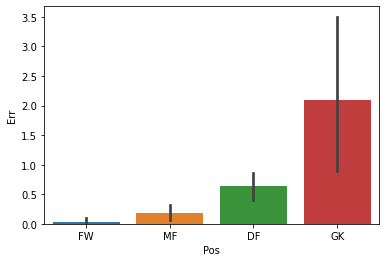

In [17]:
# To see which player positions makes the most error that leads to an opponent's shot
sns.barplot(data=new_def_data, x='Pos', y='Err')

<AxesSubplot:xlabel='Tkl', ylabel='TklW'>

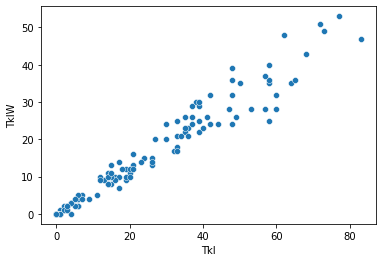

In [19]:
# To show the relation between tackle done and tackle that won the possession of the ball
sns.scatterplot(data=new_def_data, x='Tkl', y='TklW')

It can be seen that the relation between the tackle done and the tackle that won the possession of the ball is linear.

<AxesSubplot:xlabel='ShSv', ylabel='Blocks'>

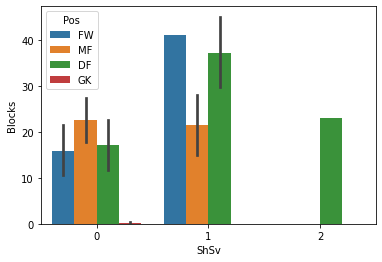

In [20]:
# To show the relation between blocking the ball that was on target and the total number of blocks
sns.barplot(data=new_def_data, x='ShSv', y='Blocks', hue='Pos')

Above graph shows that only defenders were able to block the ball that was on target 2 times.

<AxesSubplot:xlabel='Clr', ylabel='Int'>

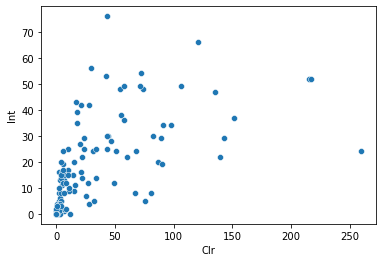

In [21]:
# To show the relation between clearance and interception
sns.scatterplot(data=new_def_data, x='Clr', y='Int')

# Feature Engineering

In [22]:
new_def_data.shape

(129, 29)

In [23]:
new_def_data.head()

,Season,Player,Nation,Pos,Age,90s,Tkl,TklW,Def 3rd,Mid 3rd,...,Press Mid 3rd,Press Att 3rd,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,15,13,3,5,...,167,202,17,0,0,17,13,28,3,0
1,2017,Roberto Firmino,br BRA,FW,25,30.7,62,48,12,35,...,373,309,41,2,1,39,25,87,10,0
2,2017,Sadio Mané,sn SEN,FW,25,24.3,33,25,9,15,...,136,133,14,1,0,13,19,52,6,0
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,38,30,16,18,...,192,72,22,2,0,20,42,80,28,0
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,48,32,15,26,...,275,60,44,1,0,43,38,86,55,0


In [26]:
# To see the correlation between the features using correlation matrix
corr_data = new_def_data.corr()
corr_data

,Season,Age,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Drb_Tkl,Att,...,Press Mid 3rd,Press Att 3rd,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
Season,1.000000,0.058381,-0.036110,-0.102899,-0.101235,-0.146174,-0.081369,0.013155,-0.042929,-0.037344,...,-0.078275,0.033006,-0.050444,-0.006182,0.136064,-0.055890,-0.026573,-0.073685,-0.121299,0.015134
Age,0.058381,1.000000,0.267096,0.167398,0.196420,0.035922,0.241328,0.185572,0.081257,0.147185,...,0.238184,0.169388,0.211991,0.151925,0.046410,0.197940,0.090635,0.142228,0.081446,0.116659
90s,-0.036110,0.267096,1.000000,0.647617,0.643399,0.572527,0.557406,0.589014,0.597867,0.638326,...,0.632478,0.572642,0.731677,0.485415,0.242088,0.694606,0.599030,0.667380,0.408173,0.324811
Tkl,-0.102899,0.167398,0.647617,1.000000,0.974909,0.880639,0.940800,0.739379,0.892979,0.921862,...,0.780157,0.417493,0.875259,0.460525,0.154457,0.866148,0.757134,0.951362,0.377310,-0.035735
TklW,-0.101235,0.196420,0.643399,0.974909,1.000000,0.814959,0.951322,0.741979,0.817523,0.861770,...,0.814750,0.436513,0.848740,0.435397,0.136247,0.843183,0.728643,0.923014,0.344894,-0.058877
Def 3rd,-0.146174,0.035922,0.572527,0.880639,0.814959,1.000000,0.704682,0.426916,0.887265,0.814702,...,0.483425,0.143700,0.774929,0.605013,0.238178,0.709006,0.808093,0.904458,0.581989,0.096564
Mid 3rd,-0.081369,0.241328,0.557406,0.940800,0.951322,0.704682,1.000000,0.715908,0.772376,0.857989,...,0.832065,0.399556,0.804167,0.341563,0.098661,0.819716,0.665477,0.872955,0.241227,-0.098055
Att 3rd,0.013155,0.185572,0.589014,0.739379,0.741979,0.426916,0.715908,1.000000,0.586333,0.695851,...,0.811760,0.791452,0.680711,0.100625,-0.009358,0.749156,0.349582,0.604275,-0.023696,-0.168039
Drb_Tkl,-0.042929,0.081257,0.597867,0.892979,0.817523,0.887265,0.772376,0.586333,1.000000,0.928210,...,0.559154,0.265011,0.820113,0.478469,0.171968,0.797805,0.767770,0.892776,0.416773,0.014633
Att,-0.037344,0.147185,0.638326,0.921862,0.861770,0.814702,0.857989,0.695851,0.928210,1.000000,...,0.751766,0.448099,0.862833,0.377226,0.163599,0.876364,0.710844,0.883095,0.274492,-0.050855


In [25]:
# To see the correlation between the features using correlation matrix
corr_data = new_def_data.corr()
corr_data

NameError: name 'new_score_data' is not defined

Saving figure 02_corr_heatmap


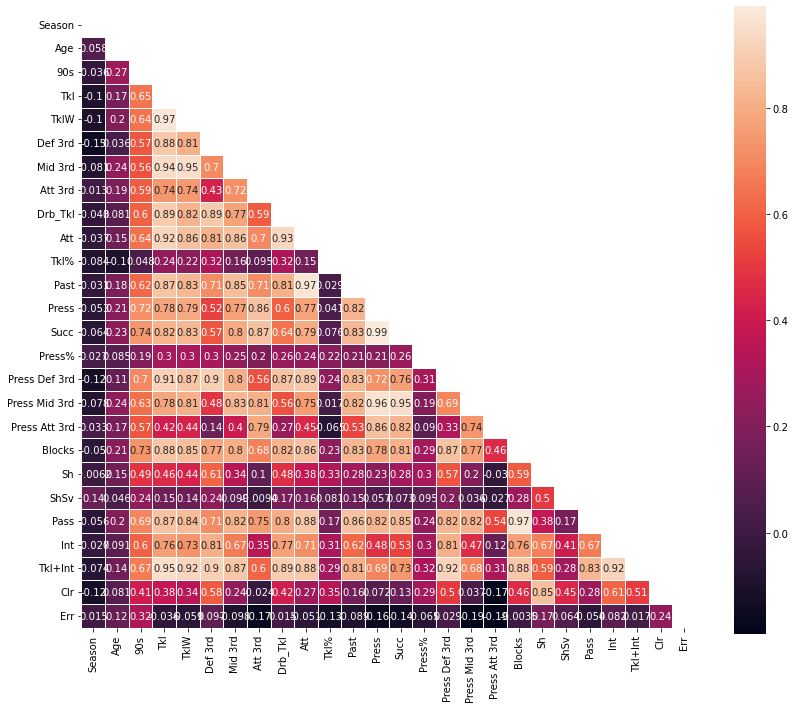

In [28]:
# To visualize in a better way
plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(corr_data, dtype=np.bool))
sns.heatmap(corr_data, mask=mask, linewidths=.5, annot=True, square=True)
save_fig("02_corr_heatmap")

In [ ]:
# To visualize in a better way
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(corr_data, dtype=np.bool))
sns.heatmap(corr_data, mask=mask, linewidths=.5, annot=True, square=True)
save_fig("02_corr_heatmap")

Now after looking at the correlation matrix, I am going to remove the features that are highly correlated.

## K-Means Clustering without PCA

This is the most often used clustering approach. In each iteration, it uses the Euclidean distance between clusters to determine which data point belongs to which cluster and then proceeds appropriately. Several strategies can be used to determine how many clusters to consider. Elbow Curve is the most basic and regularly used approach.

In [32]:
# Creating new copy of data for doing the cluster operation
clus_data = new_def_data.copy()

# To remove the unwanted features from the dataset after correlation matrix and also the ones that are string
clus_data.drop(['Player','Nation','Pos','Tkl','Drb_Tkl','Att','Press','Press Def 3rd','Press Mid 3rd','Press Att 3rd','Pass','Tkl+Int'], axis=1, inplace=True)

In [33]:
clus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Season   129 non-null    int64  
 1   Age      129 non-null    int64  
 2   90s      129 non-null    float64
 3   TklW     129 non-null    int64  
 4   Def 3rd  129 non-null    int64  
 5   Mid 3rd  129 non-null    int64  
 6   Att 3rd  129 non-null    int64  
 7   Tkl%     129 non-null    float64
 8   Past     129 non-null    int64  
 9   Succ     129 non-null    int64  
 10  Press%   129 non-null    float64
 11  Blocks   129 non-null    int64  
 12  Sh       129 non-null    int64  
 13  ShSv     129 non-null    int64  
 14  Int      129 non-null    int64  
 15  Clr      129 non-null    int64  
 16  Err      129 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 17.3 KB


In [32]:
# To see the scaled data after standarizing
df_scaled_data = pd.DataFrame(scaled_data)
col_list = list(clus_data.columns)
df_scaled_data.columns = col_list
df_scaled_data.head()

,season,Venue,Result,GF,GA,xG,xGA,Poss,Attendance,Formation
0,-1.414214,1.0,-0.867585,0.558552,2.007001,1.228741,1.714944,-0.845275,-0.611776,-0.380124
1,-1.414214,-1.0,0.617470,-0.856446,-0.790042,0.438878,-0.562591,0.959245,0.798252,-0.380124
2,-1.414214,-1.0,0.617470,1.266051,-0.790042,1.115903,-0.410755,-1.376016,0.801181,-0.380124
3,-1.414214,1.0,-2.352640,-1.563945,3.871696,-1.479359,2.625958,-2.862091,0.842796,-0.380124
4,-1.414214,-1.0,-0.867585,-0.856446,0.142306,0.100366,-0.562591,1.065393,0.802258,-0.380124


In [33]:
# To calculate the inertia using KMeans for plotting elbow curve
from sklearn.cluster import KMeans

kmeans_clus = [KMeans(n_clusters=i, random_state=42).fit(df_scaled_data) for i in range(1,11)]
inertia = [mod.inertia_ for mod in kmeans_clus]

In [ ]:
clus_data.info()

Inertia is the sum of squares within a cluster. It is a measurement that shows how well the clusters work together. Inertia assumes that clusters are convex and isotropic. It doesn't work well for long clusters or manifolds with odd shapes, so hierarchical clustering is a better choice here. Inertia also doesn't work well in spaces with a lot of dimensions because Euclidean distances between points are inflated and no normalisation is done first; they are not a standardised metric.

In [41]:
# To standardize the data first and then use the scaled data for all clustering work
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_data = sc.fit_transform(clus_data)

In [42]:
# To see the scaled data after standarizing
df_scaled_data = pd.DataFrame(scaled_data)
col_list = list(clus_data.columns)
df_scaled_data.columns = col_list
df_scaled_data.head()

,Season,Age,90s,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl%,Past,Succ,Press%,Blocks,Sh,ShSv,Int,Clr,Err
0,-1.41763,-0.075023,1.329671,-0.139616,-0.648902,-0.517410,0.621342,-0.180721,-0.094612,1.013294,-0.005664,-0.116490,-0.745147,-0.323921,-0.213988,-0.593160,-0.458731
1,-1.41763,-0.075023,1.197517,2.402185,0.250114,2.484656,2.397587,-0.430344,1.659851,2.717905,0.119092,1.326125,-0.276250,2.660783,0.487821,-0.442704,-0.458731
2,-1.41763,-0.075023,0.668901,0.731859,-0.049558,0.483278,1.065403,0.044348,0.286793,0.709502,0.270582,-0.296817,-0.510698,-0.323921,0.136916,-0.528679,-0.458731
3,-1.41763,0.179660,0.850613,1.094973,0.649677,0.783485,-0.044750,0.555868,-0.094612,1.013294,0.297316,0.184055,-0.276250,-0.323921,1.482051,-0.055817,-0.458731
4,-1.41763,0.434342,0.652382,1.240219,0.549786,1.584036,0.621342,-0.315763,1.736132,1.300209,0.154737,1.506452,-0.510698,-0.323921,1.248114,0.524513,-0.458731


In [43]:
# To calculate the inertia using KMeans for plotting elbow curve
from sklearn.cluster import KMeans

kmeans_clus = [KMeans(n_clusters=i, random_state=42).fit(df_scaled_data) for i in range(1,11)]
inertia = [mod.inertia_ for mod in kmeans_clus]

In [45]:
# To see the value of the inertia
inertia

[2193.0,
 1426.202835655079,
 1223.4993668323764,
 1105.9857368142964,
 1012.381326563253,
 928.3672104860576,
 876.6511670060866,
 798.3004129522451,
 763.5314930786307,
 715.0613916565758]

Saving figure 04_Elbow_point


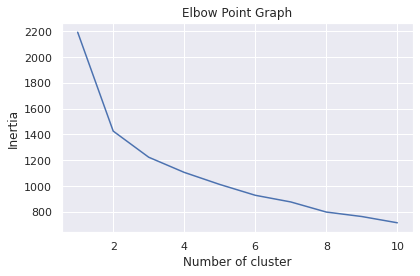

In [49]:
# To plot the elbow curve for knowing the optimal number of clusters
sns.set()
plt.plot(range(1,11), inertia)
plt.title('Elbow Point Graph')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
save_fig("04_Elbow_point")
plt.show()

In [47]:
# To check silhouette score
from sklearn.metrics import silhouette_score

sil_scores = [silhouette_score(df_scaled_data, model.labels_) for model in kmeans_clus[1:]]
sil_scores

[0.309501836791023,
 0.2766497921982349,
 0.1709906009251584,
 0.18727139295228004,
 0.1608839177221437,
 0.15983161193663248,
 0.18263395416734665,
 0.17225579785127088,
 0.18476559115054444]

Saving figure 04_Sil_score


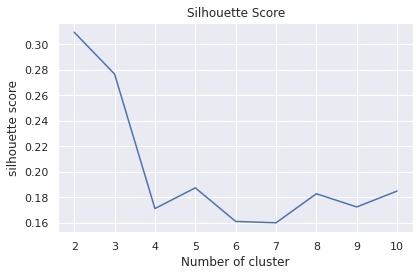

In [50]:
# To show the graphical way of silhoutte score
plt.plot(range(2,11), sil_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of cluster')
plt.ylabel('silhouette score')
save_fig("04_Sil_score")
plt.show()

When you plot every instance's silhouette coefficient, sorted by the cluster they belong to and by the value of the coefficient, you get an even more informative picture.

When you plot the silhouette coefficient of each instance, ordered by cluster and coefficient value, you get an even more interesting visualisation. This is known as a silhouette diagram:

Saving figure 04_sil_diag


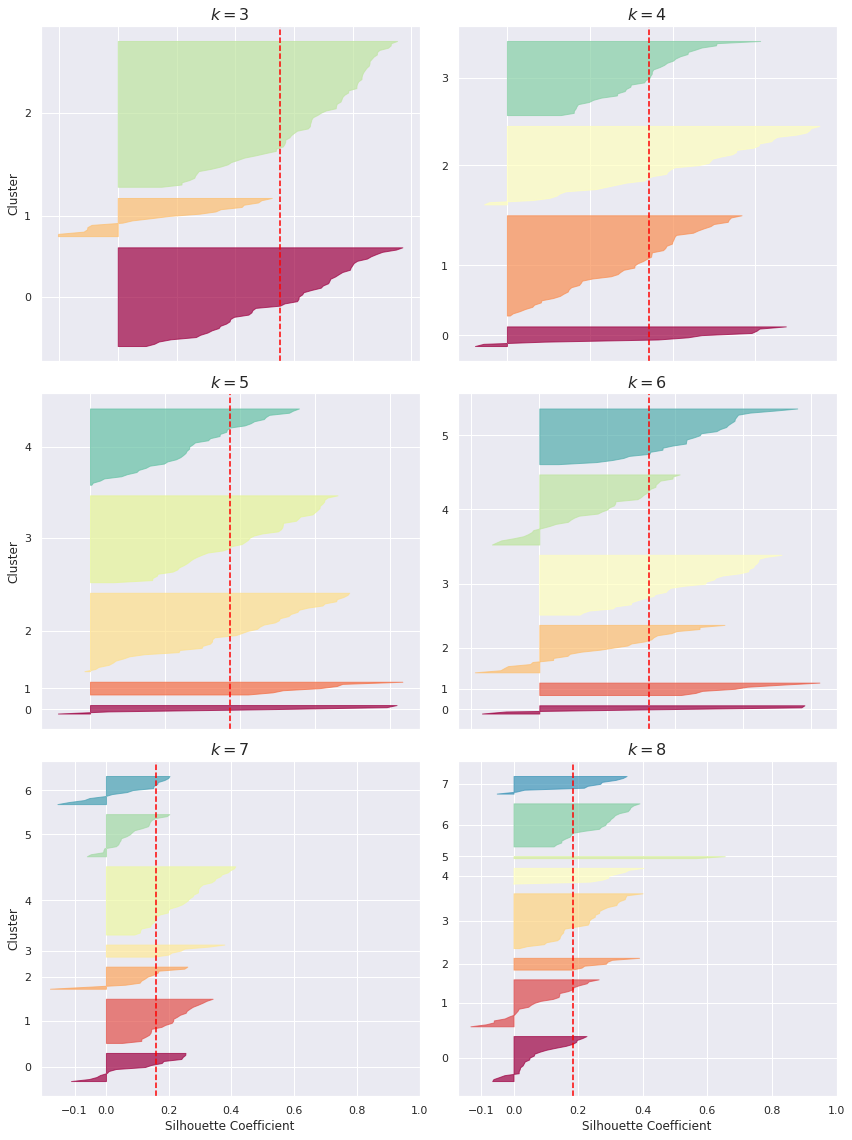

In [52]:
# To plot the silhouette diagram
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

import matplotlib as mpl

plt.figure(figsize=(12,16))

for i in (3,4,5,6,7,8):
    plt.subplot(3,2,i-2)
    
    y_pred = kmeans_clus[i-1].labels_
    sil_coeff = silhouette_samples(df_scaled_data, y_pred)
    
    padding = len(df_scaled_data)//30
    posit = padding
    ticks = []
    for j in range(i):
        coeffs = sil_coeff[y_pred == j]
        coeffs.sort()
        
        color = mpl.cm.Spectral(j / i)
        plt.fill_betweenx(np.arange(posit, posit + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        
        ticks.append(posit+len(coeffs)//2)
        posit+=len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(i)))
    
    if i in (3,5,7):
        plt.ylabel("Cluster")
        
    if i in (7,8):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
        
    else:
        plt.tick_params(labelbottom=False)
    
    plt.axvline(x=sil_scores[i - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(i), fontsize=16)
save_fig('04_sil_diag')
plt.show()

For n_clusters=4, all the plots are more or less of similar thickness and hence are of similar sizes, as can be considered as best number of cluster.

Silhouette analysis can be used to study the separation distance between the resulting clusters and can be considered a better method compared to the Elbow method.

In [53]:
# Running K means in 4 clusters 
kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_4.fit(df_scaled_data)

# predictions for new data
pred = kmeans_4.predict(df_scaled_data)

# To check the centers of the cluster
print(kmeans_4.cluster_centers_)

[[ 0.3207186   0.30700066  1.1405256   0.49946531  1.14913012  0.13303731
  -0.26678102  0.76538742  0.11134662  0.13736057  0.58514685  1.15782031
   2.44335419  2.36231227  1.75107756  2.42240815  0.66357812]
 [ 0.0618156  -0.41098644 -0.82046658 -0.97400671 -0.85718503 -0.9006529
  -0.81004751 -0.35259249 -0.89312816 -0.97715396 -0.48118028 -0.98615228
  -0.64538134 -0.32392137 -0.85482481 -0.57258076  0.08397167]
 [-0.19608778  0.12459312  0.8316381   1.24021876  0.93854974  1.26760201
   1.08340538  0.10971173  1.202165    1.21399766  0.19688427  1.1116826
   0.27502151 -0.16258602  0.76127361  0.0795353  -0.15540421]
 [ 0.03264938  0.33246888 -0.10325532 -0.14584091 -0.169427   -0.16859888
   0.01868697  0.13881825 -0.10332993 -0.01043666  0.27083675 -0.18175148
  -0.12218329 -0.06808959 -0.15717522 -0.00730263 -0.13807125]]


In [54]:
# To return label for each data point based on their cluster
print(kmeans_4.labels_)

[3 2 3 2 2 0 2 0 2 2 1 1 2 2 3 2 3 3 3 1 1 1 1 1 1 1 1 1 0 3 2 2 2 2 2 2 2
 2 3 2 3 3 3 3 1 1 1 1 1 1 0 2 2 2 2 3 2 1 2 2 3 3 3 1 3 3 3 3 3 1 1 1 1 1
 0 3 2 2 1 2 2 2 2 3 0 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 3 2 0 2
 2 2 2 3 3 3 1 3 3 3 1 1 1 1 1 1 1 1]


In [55]:
# To see the number of instances belong to different cluster
pd.Series(kmeans_4.labels_).value_counts()

1    47
2    37
3    35
0    10
dtype: int64

In [56]:
# To add new column which is KM_Clusters value in scaled data
pred = kmeans_4.labels_
df_cluster_data = pd.DataFrame(df_scaled_data)
df_cluster_data['KM_Clusters'] = pred
df_cluster_data.head()

,Season,Age,90s,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl%,Past,Succ,Press%,Blocks,Sh,ShSv,Int,Clr,Err,KM_Clusters
0,-1.41763,-0.075023,1.329671,-0.139616,-0.648902,-0.517410,0.621342,-0.180721,-0.094612,1.013294,-0.005664,-0.116490,-0.745147,-0.323921,-0.213988,-0.593160,-0.458731,3
1,-1.41763,-0.075023,1.197517,2.402185,0.250114,2.484656,2.397587,-0.430344,1.659851,2.717905,0.119092,1.326125,-0.276250,2.660783,0.487821,-0.442704,-0.458731,2
2,-1.41763,-0.075023,0.668901,0.731859,-0.049558,0.483278,1.065403,0.044348,0.286793,0.709502,0.270582,-0.296817,-0.510698,-0.323921,0.136916,-0.528679,-0.458731,3
3,-1.41763,0.179660,0.850613,1.094973,0.649677,0.783485,-0.044750,0.555868,-0.094612,1.013294,0.297316,0.184055,-0.276250,-0.323921,1.482051,-0.055817,-0.458731,2
4,-1.41763,0.434342,0.652382,1.240219,0.549786,1.584036,0.621342,-0.315763,1.736132,1.300209,0.154737,1.506452,-0.510698,-0.323921,1.248114,0.524513,-0.458731,2


In [57]:
# To add KM_Clusters column in the original data
pred = kmeans_4.labels_
df_updated_data = pd.DataFrame(new_def_data)
df_updated_data['KM_Clusters'] = pred
df_updated_data.head()

,Season,Player,Nation,Pos,Age,90s,Tkl,TklW,Def 3rd,Mid 3rd,...,Press Att 3rd,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,KM_Clusters
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,15,13,3,5,...,202,17,0,0,17,13,28,3,0,3
1,2017,Roberto Firmino,br BRA,FW,25,30.7,62,48,12,35,...,309,41,2,1,39,25,87,10,0,2
2,2017,Sadio Mané,sn SEN,FW,25,24.3,33,25,9,15,...,133,14,1,0,13,19,52,6,0,3
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,38,30,16,18,...,72,22,2,0,20,42,80,28,0,2
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,48,32,15,26,...,60,44,1,0,43,38,86,55,0,2


Saving figure 04_count_kmeans


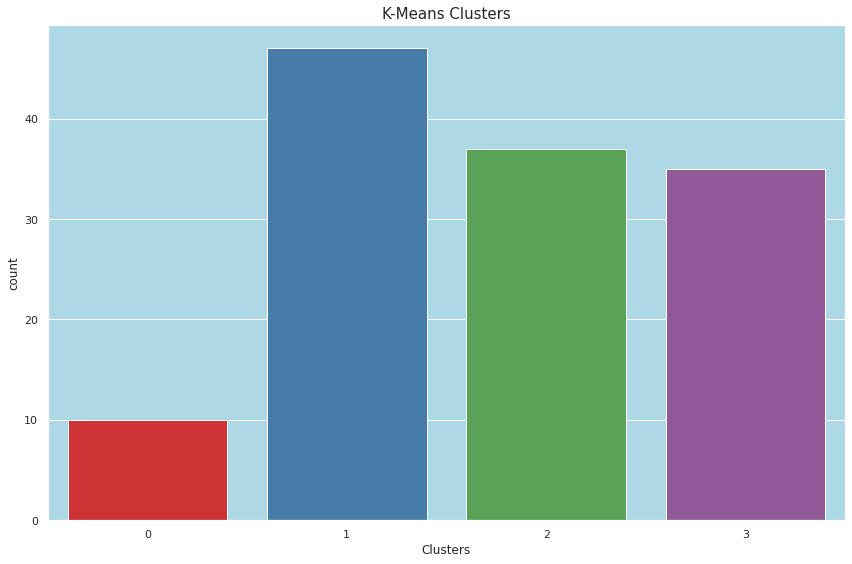

In [58]:
# To plot the counplot of different clusters
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.figure(figsize=(12,8))
sns.countplot(x=df_updated_data['KM_Clusters'], data=df_updated_data, palette='Set1')
plt.title("K-Means Clusters", fontsize=15)
plt.xlabel("Clusters", fontsize=12)
plt.rcParams['axes.facecolor'] = 'lightblue'
save_fig("04_count_kmeans")
plt.show()

# Using PCA to visualise and improve results

PCA (Principal Component Analysis) is a basic way to reduce the number of dimensions by combining features in X in linear ways so that each new component captures the most information or variation in the data. Most of the time, n components is small, like 3, and can be used for data visualisation, data compression, and exploratory analysis.

I'll standardise the data using Scikit-StandardScaler Learn's class before fitting a PCA model to it.

In [59]:
# To drop the unwanted features that adds nothing to the information
updated_data = new_def_data.copy()
updated_data.drop(['Player','Nation','Pos','Tkl','Drb_Tkl','Att','Press','Press Def 3rd','Press Mid 3rd','Press Att 3rd','Pass','Tkl+Int','KM_Clusters'], axis=1, inplace=True)
updated_data.head()

,Season,Age,90s,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl%,Past,Succ,Press%,Blocks,Sh,ShSv,Int,Clr,Err
0,2017,25,32.3,13,3,5,7,27.8,13,129,30.1,17,0,0,13,3,0
1,2017,25,30.7,48,12,35,15,21.7,36,230,31.5,41,2,1,25,10,0
2,2017,25,24.3,25,9,15,9,33.3,18,111,33.2,14,1,0,19,6,0
3,2017,26,26.5,30,16,18,4,45.8,13,129,33.5,22,2,0,42,28,0
4,2017,27,24.1,32,15,26,7,24.5,37,146,31.9,44,1,0,38,55,0


In [61]:
# To check the updated data shape
updated_data.shape

(129, 17)

In [62]:
# To standarise the data
pca_scaler = StandardScaler()
pca_scaled_data = pca_scaler.fit_transform(updated_data)

In [63]:
# To perform the PCA 
from sklearn.decomposition import PCA

# 0.95 to check how many principal components make a variance of 95%.
pca = PCA(n_components=0.95)
components = pca.fit(pca_scaled_data).transform(pca_scaled_data)
print('Total no. of principal components =',pca.n_components_)

Total no. of principal components = 10


In [64]:
# To check the shape of the components
components.shape

(129, 10)

Text(0, 0.5, 'Explained Variance Ratio')

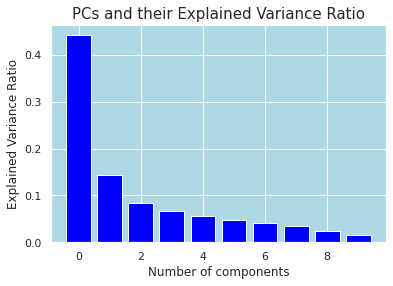

In [65]:
# Plot to explained variance ratio for each PC (Principal Component)
var = pca.explained_variance_ratio_

plt.bar([i for i, _ in enumerate(var)],var,color='blue')
plt.title('PCs and their Explained Variance Ratio', fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)

Typically, we want the explained variance to be between 95-99%. Therefore, for that to achieve total number of components should be 10.

In [66]:
# Percentage of variance explained for each components
print("Explained variance ratio: %s" % str(pca.explained_variance_ratio_))

Explained variance ratio: [0.44236237 0.143194   0.08416661 0.06632357 0.05578521 0.04735953
 0.04224714 0.03397633 0.02495288 0.01482866]


In [67]:
# Cumulative Variance explained by each PC
cumulative_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(cumulative_var)

[44.24 58.56 66.98 73.61 79.19 83.93 88.15 91.55 94.05 95.53]


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

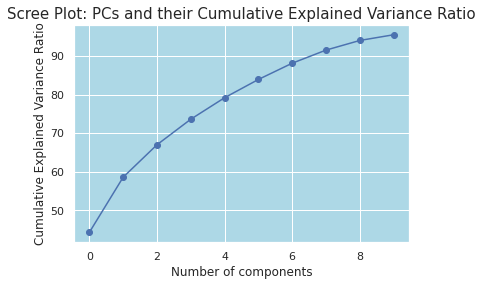

In [68]:
# To plot the relation between number of components and variance
plt.plot(cumulative_var, marker='o')
plt.title('Scree Plot: PCs and their Cumulative Explained Variance Ratio',fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=12)

In [69]:
# To show PC (Principal Component) data decomposition
col_names = list(updated_data.columns)
pca_data = pd.DataFrame({ 'Features':col_names,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                          'PC4':pca.components_[3],'PC5':pca.components_[4], 'PC6':pca.components_[5], 'PC7':pca.components_[6], 
                          'PC8':pca.components_[7], 'PC9':pca.components_[8], 'PC10':pca.components_[9]})
pca_data

,Features,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,Season,-0.027074,-0.002339,0.244693,-0.760743,0.140654,0.418134,-0.287719,-0.211363,0.148491,-0.022288
1,Age,0.086007,-0.060314,0.436137,-0.119372,-0.624161,-0.492936,-0.269651,-0.174504,-0.121227,0.097542
2,90s,0.283983,0.004241,0.324845,0.125959,0.004878,0.145958,-0.018821,0.426699,0.188581,0.433782
3,TklW,0.340171,-0.129310,-0.070810,0.048174,0.008867,0.017604,-0.035050,-0.173352,-0.098026,-0.264332
4,Def 3rd,0.312472,0.120008,-0.118990,0.153192,0.101868,0.116386,0.012694,-0.328847,-0.078048,0.053830
5,Mid 3rd,0.318633,-0.189962,-0.048566,0.019086,0.010645,-0.053941,-0.041230,-0.280104,-0.185511,-0.327722
6,Att 3rd,0.256973,-0.353965,0.001918,-0.081115,-0.015075,0.068313,-0.086190,0.387834,0.056838,-0.375299
7,Tkl%,0.097899,0.210774,-0.512048,-0.021924,-0.198753,0.121223,-0.654784,0.280487,-0.285926,0.083274
8,Past,0.309183,-0.222202,0.030715,-0.013752,0.154427,-0.014087,0.091318,-0.166853,-0.130548,0.128733
9,Succ,0.307530,-0.273943,0.033548,-0.021221,-0.007514,-0.005859,0.037075,0.276520,0.157941,0.068994


In [70]:
pca_data.shape

(17, 11)

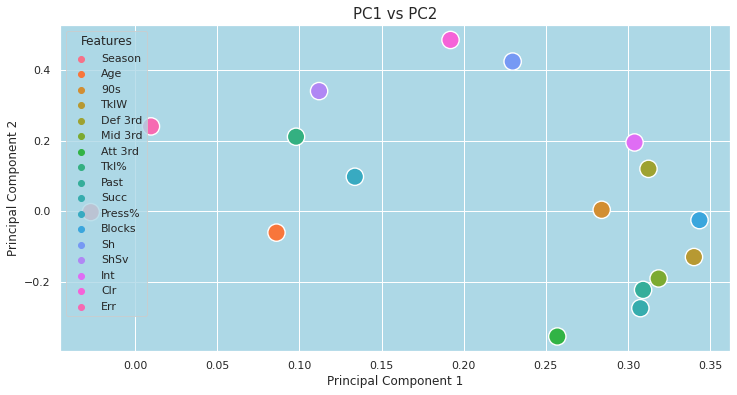

In [71]:
# To visualise the 2 main PCs
fig = plt.figure(figsize = (12,6))
sns.scatterplot(pca_data.PC1, pca_data.PC2, hue=pca_data.Features, marker='o', s=300)
plt.title('PC1 vs PC2',fontsize=15)
plt.xlabel('Principal Component 1',fontsize=12)
plt.ylabel('Principal Component 2',fontsize=12)
plt.show()

It can be noticed that the first Principal Component (X-axis) is primarily drawn to features such as 90s, Blocks, and Att 3rd. The 2nd Principal Component (Y-axis) is mostly drawn to features such as Err and Sh.

In [72]:
# To run the KMeans again after performing PCA
pca_kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
pca_kmeans_4.fit(pca_scaled_data)

# predictions for pca scaled data
y_num = pca_kmeans_4.predict(pca_scaled_data)

Explained variance ration (first two components): [0.44236237 0.143194  ]
Saving figure 04_PCA_2_Items


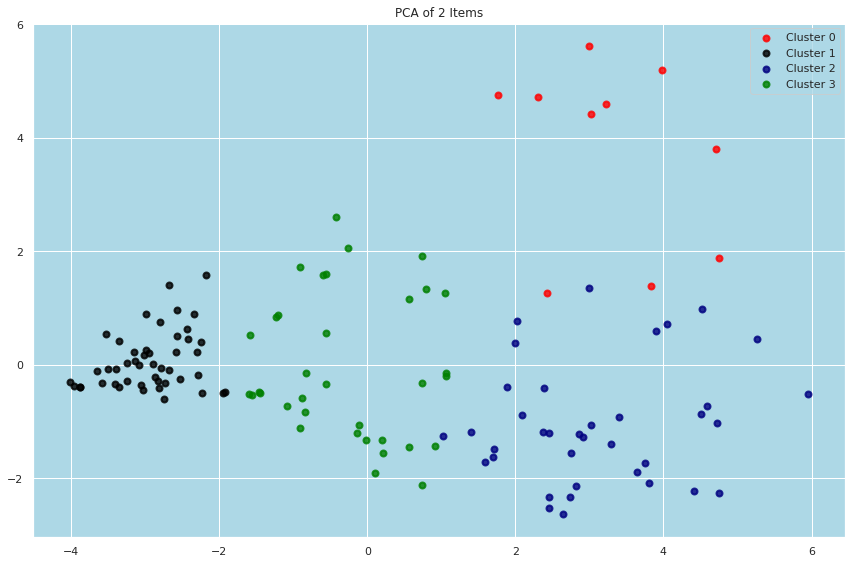

In [73]:
# To visualise the data after running PCA
targets = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3']

# Number of components is equal to 2 so that I can visualise the data
pca = PCA(n_components=2, random_state=42)
X_r = pca.fit(pca_scaled_data).transform(pca_scaled_data)

# To show the percentage of variance for each component
print('Explained variance ration (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure(figsize=(12,8))
colors = ['red','black','navy','green']
lw = 2

for color, i, target in zip(colors, [0,1,2,3], targets):
    plt.scatter(x=X_r[y_num==i,0], y=X_r[y_num==i,1], color=color, alpha=.8, lw=lw, label=target)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of 2 Items')
save_fig("04_PCA_2_Items")
plt.show()

We can see, the variance explained by first and second principal components are nearly 44% and 14% respectively. We can now count cumulative variance explained by them. For convenience of observation, we are converting the figures to percentages here.

In [74]:
# Running PCA again with total 10 components which was selected above
pca = PCA(n_components=10, random_state=42)
X = pca.fit(pca_scaled_data).transform(pca_scaled_data)

wcss2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss2.append(kmeans.inertia_)

Saving figure 04_Elbow_point2


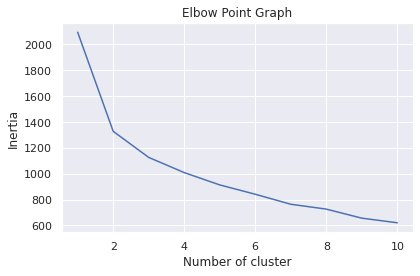

In [75]:
# To check the updated elbow point graph
sns.set()
plt.plot(range(1,11), wcss2)
plt.title('Elbow Point Graph')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
save_fig("04_Elbow_point2")
plt.show()

In [76]:
# To check the updated value of inertia for clusters after PCA
wcss2

[2094.745471639554,
 1328.0344063961559,
 1126.1742062658748,
 1008.6316443961708,
 913.3782270777705,
 841.2218794492543,
 763.7695505081093,
 726.0889346918417,
 656.1301395599943,
 620.3860190303064]

In conclusion, it can be seen that PCA managed to improve our results by reducing inertia for clustering.

Saving figure 04_KM_cluster


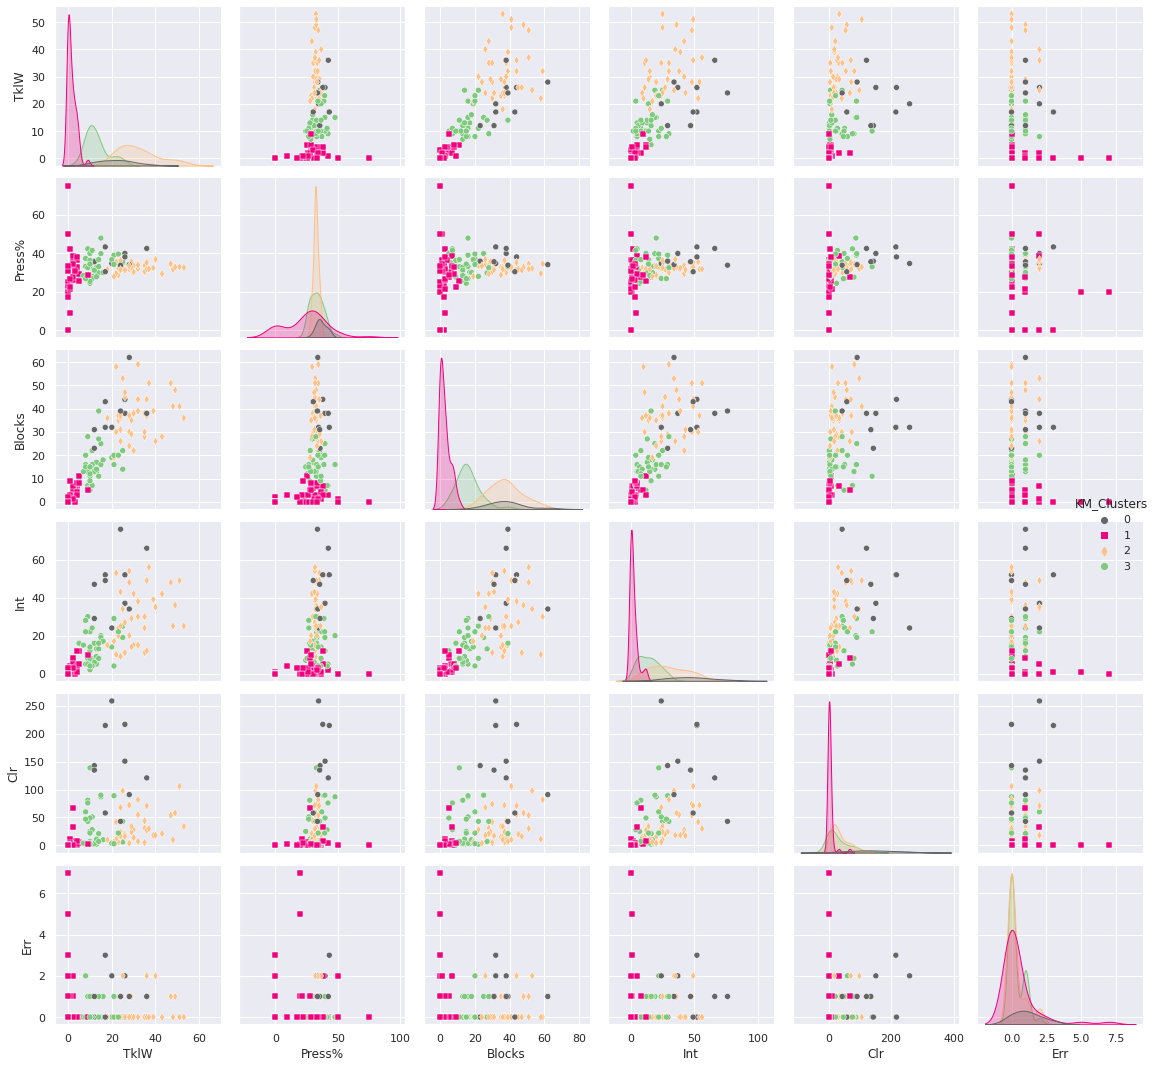

In [80]:
# To plot the clusterting distribution of all the important features
sns.pairplot(data=df_updated_data, x_vars=['TklW','Press%','Blocks','Int','Clr','Err'],
             y_vars=['TklW','Press%','Blocks','Int','Clr','Err'], hue='KM_Clusters', 
             palette='Accent_r', markers=['o','s','d','o'])
save_fig("04_KM_cluster")

Let us determine the common qualities that players share with each cluster in K-Means Clustering using the pairplot above:

Cluster 0 traits:
- Players in this cluster won the tackle in which tackler's team won the possession between 10 and 35 times each season
- Players in this cluster gain possession within 5 seconds of applying pressure between 25% and 45% of the time each season
- Players in this cluster blocks the ball between 22 and 62 of the times each season 
- Players in this cluster intercepts the ball between 25 and 75 of the times per season
- Players in this cluster makes the clearance of the ball between 50 and 250 times per season
- Players in this cluster makes the error that leads to a shot by an opponent between 0 and 3 times per season

Cluster 1 traits:
- Players in this cluster won the tackle in which tackler's team won the possession between 0 and 10 times each season
- Players in this cluster gain possession within 5 seconds of applying pressure between 0% and 75% of the time each season
- Players in this cluster blocks the ball between 0 and 10 of the times each season 
- Players in this cluster intercepts the ball between 0 and 15 of the times per season
- Players in this cluster makes the clearance of the ball between 0 and 80 times per season
- Players in this cluster makes the error that leads to a shot by an opponent between 0 and 7 times per season

Cluster 2 traits:
- Players in this cluster won the tackle in which tackler's team won the possession between 20 and 55 times each season
- Players in this cluster gain possession within 5 seconds of applying pressure between 25% and 40% of the time each season
- Players in this cluster blocks the ball between 20 and 60 of the times each season 
- Players in this cluster intercepts the ball between 10 and 55 of the times per season
- Players in this cluster makes the clearance of the ball between 0 and 120 times per season
- Players in this cluster makes the error that leads to a shot by an opponent between 0 and 2 times per season

Cluster 3 traits:
- Players in this cluster won the tackle in which tackler's team won the possession between 5 and 22 times each season
- Players in this cluster gain possession within 5 seconds of applying pressure between 25% and 50% of the time each season
- Players in this cluster blocks the ball between 8 and 40 of the times each season 
- Players in this cluster intercepts the ball between 5 and 30 of the times per season
- Players in this cluster makes the clearance of the ball between 0 and 150 times per season
- Players in this cluster makes the error that leads to a shot by an opponent between 0 and 2 times per season

In [81]:
# Exporting clustering results
new_def_data.to_csv("04_KM_clustering_results.csv", index=False)

# Using DBSCAN 

DBSCAN is a density-based spatial clustering method. It sees clusters as high-density areas separated by low-density areas. Unlike K Means, which focuses on locating centroids and associating data points with that centroid in a spherical fashion, the DBSCAN algorithm may locate clusters of any convex form. DBSCAN is also resistant to low-density areas. DBSCAN, unlike k-means, will determine the number of clusters.

Here, I try to remove as many anomalies as possible so that the model has the right number of clusters.

In [82]:
df_check_data = pd.DataFrame(pca_scaled_data)
col_li = list(updated_data.columns)
df_check_data.columns = col_li
df_check_data.head()

,Season,Age,90s,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl%,Past,Succ,Press%,Blocks,Sh,ShSv,Int,Clr,Err
0,-1.41763,-0.075023,1.329671,-0.139616,-0.648902,-0.517410,0.621342,-0.180721,-0.094612,1.013294,-0.005664,-0.116490,-0.745147,-0.323921,-0.213988,-0.593160,-0.458731
1,-1.41763,-0.075023,1.197517,2.402185,0.250114,2.484656,2.397587,-0.430344,1.659851,2.717905,0.119092,1.326125,-0.276250,2.660783,0.487821,-0.442704,-0.458731
2,-1.41763,-0.075023,0.668901,0.731859,-0.049558,0.483278,1.065403,0.044348,0.286793,0.709502,0.270582,-0.296817,-0.510698,-0.323921,0.136916,-0.528679,-0.458731
3,-1.41763,0.179660,0.850613,1.094973,0.649677,0.783485,-0.044750,0.555868,-0.094612,1.013294,0.297316,0.184055,-0.276250,-0.323921,1.482051,-0.055817,-0.458731
4,-1.41763,0.434342,0.652382,1.240219,0.549786,1.584036,0.621342,-0.315763,1.736132,1.300209,0.154737,1.506452,-0.510698,-0.323921,1.248114,0.524513,-0.458731


In [183]:
# min points = 2 because larger values is for large data, noisy data or data that containse many duplicates
from sklearn.cluster import DBSCAN

# a minimum minPts can be derived from the number of dimensions D in the data set, as minPts = D + 1. 
# The low value minPts = 1 does not make sense, as then every point on its own will already be a cluster. 
# With minPts = 2, the result will be the same as of hierarchical clustering with the single link metric, 
# with the dendrogram cut at height e. Therefore, minPts must be chosen at least 3.
from itertools import product

dbs = DBSCAN(eps=2, min_samples=3)

# Where -1 indicates they are the outliers (do not fall in any clusters)
dbs_model = dbs.fit(pca_scaled_data)
labels = dbs_model.labels_
labels

array([ 0, -1,  0,  0,  1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0,  0,
       -1,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1,  0, -1,  3,  0,  3,
       -1,  1,  1,  1, -1,  0, -1,  2, -1,  2,  2,  2,  2,  2, -1, -1, -1,
       -1,  3, -1,  3,  0,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2,
        2,  2,  2,  2,  2,  2, -1, -1, -1,  3, -1,  3,  3, -1, -1, -1, -1,
       -1,  2, -1, -1,  2, -1,  2, -1,  2,  2, -1,  2,  2,  2, -1,  2, -1,
       -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,  2,  2,
       -1,  2,  2,  2,  2,  2,  2,  2, -1,  2])

In [184]:
# identifying the points which makes up core points
cores = np.zeros_like(labels, dtype=bool)
cores[dbs.core_sample_indices_] = True

# calculating the number of clusters
dbs_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters are: ", dbs_clusters)

Number of clusters are:  4


In [185]:
# to calculate silhouetter score
print(silhouette_score(pca_scaled_data, labels))

0.01060277170515466


In [186]:
# To see the the amount of data divided into clusters
pd.Series(dbs_model.labels_).value_counts()

-1    63
 2    43
 0    10
 3     9
 1     4
dtype: int64

It can be seen that 10.85% of data points have been labelled to the first two clusters.

In [187]:
# To save the cluster labels and sort by cluster
data_copy = new_def_data.copy()
data_copy = data_copy.drop('KM_Clusters', axis=1)
data_copy['DB_clusters'] = dbs.labels_

In [188]:
# To review the cluster centers
data_copy.groupby('DB_clusters').mean()

,Season,Age,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Drb_Tkl,Att,...,Press Mid 3rd,Press Att 3rd,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
DB_clusters,,,,,,,,,,,,,,,,,,,,,
-1,2019.238095,25.777778,20.246032,30.682540,18.460317,13.539683,12.682540,4.460317,10.984127,27.730159,...,96.507937,54.698413,23.253968,5.000000,0.222222,18.253968,24.031746,54.714286,51.428571,0.873016
0,2017.500000,25.000000,24.920000,32.500000,21.700000,12.600000,12.900000,7.000000,10.200000,29.300000,...,161.900000,137.100000,23.600000,2.400000,0.000000,21.200000,19.400000,51.900000,20.600000,0.000000
1,2017.750000,27.750000,22.125000,50.750000,33.000000,16.750000,28.250000,5.750000,14.750000,48.500000,...,228.250000,75.250000,41.500000,4.000000,0.000000,37.500000,33.500000,84.250000,34.250000,0.000000
2,2019.162791,23.953488,4.432558,6.395349,4.046512,2.255814,2.720930,1.418605,1.906977,7.232558,...,33.209302,26.232558,5.093023,0.534884,0.000000,4.558140,3.883721,10.279070,5.511628,0.023256
3,2019.333333,27.555556,31.800000,38.111111,26.555556,9.111111,17.111111,11.888889,8.888889,34.111111,...,235.000000,212.000000,39.666667,3.555556,0.000000,36.111111,15.555556,53.666667,14.111111,0.222222


In [189]:
data_copy.head()

,Season,Player,Nation,Pos,Age,90s,Tkl,TklW,Def 3rd,Mid 3rd,...,Press Att 3rd,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,DB_clusters
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,15,13,3,5,...,202,17,0,0,17,13,28,3,0,0
1,2017,Roberto Firmino,br BRA,FW,25,30.7,62,48,12,35,...,309,41,2,1,39,25,87,10,0,-1
2,2017,Sadio Mané,sn SEN,FW,25,24.3,33,25,9,15,...,133,14,1,0,13,19,52,6,0,0
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,38,30,16,18,...,72,22,2,0,20,42,80,28,0,0
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,48,32,15,26,...,60,44,1,0,43,38,86,55,0,1


Saving figure 04_DB_cluster


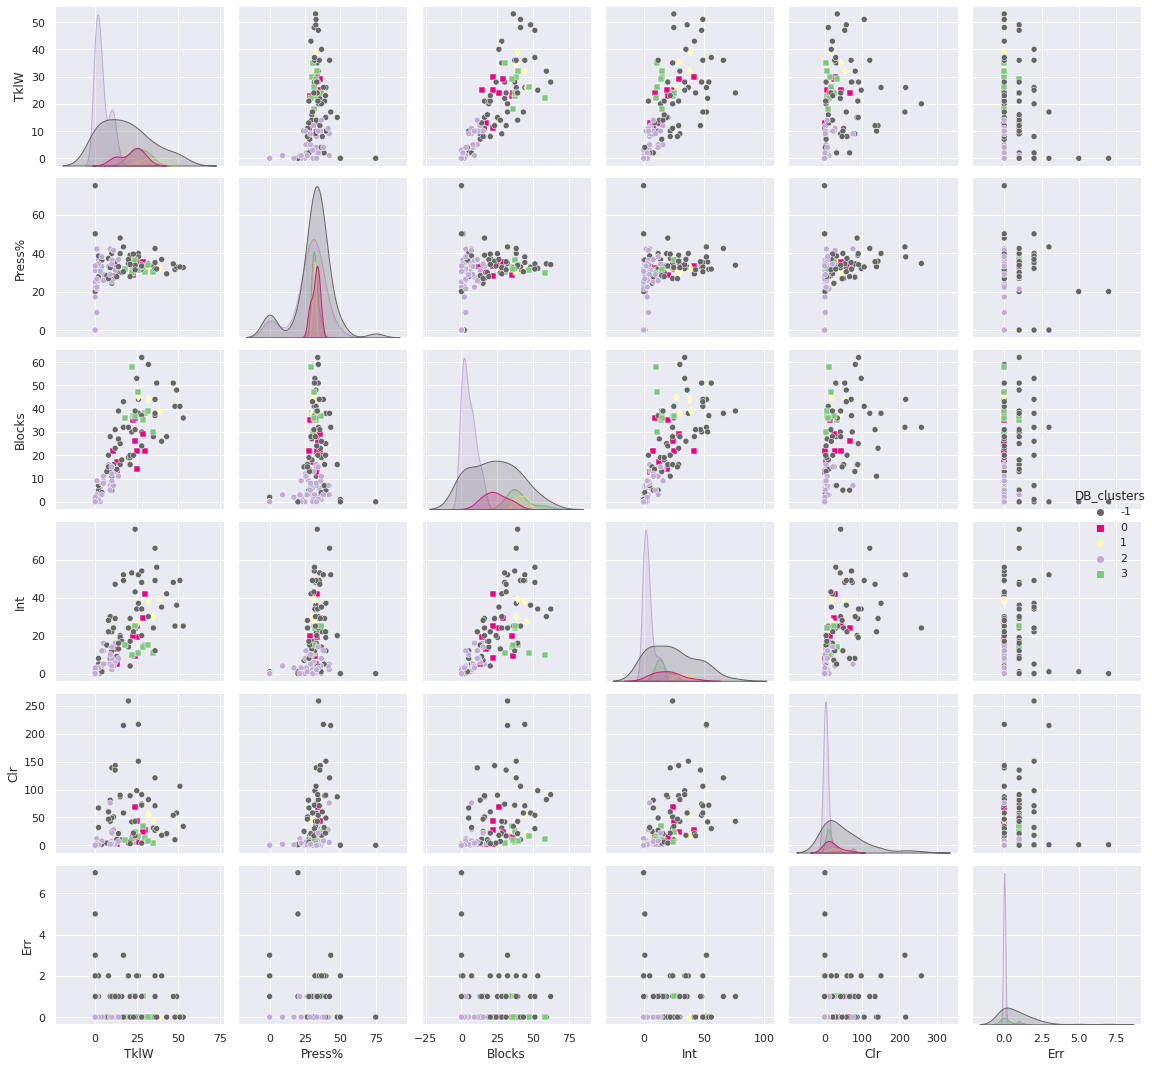

In [192]:
# To plot the clusterting distribution of all the important features
sns.pairplot(data=data_copy, x_vars=['TklW','Press%','Blocks','Int','Clr','Err'],
             y_vars=['TklW','Press%','Blocks','Int','Clr','Err'], hue='DB_clusters', 
             palette='Accent_r', markers=['o','s','d','o','s'])
save_fig("04_DB_cluster")

Let us determine the common qualities that players share with each cluster in DBSCAN Clustering using the pairplot above:

Cluster 0 traits:
- Players in this cluster won the tackle in which tackler's team won the possession between 10 and 30 times each season
- Players in this cluster gain possession within 5 seconds of applying pressure between 25% and 35% of the time each season
- Players in this cluster blocks the ball between 35 and 60 of the times each season 
- Players in this cluster intercepts the ball between 10 and 25 of the times per season
- Players in this cluster makes the clearance of the ball between 0 and 40 times per season
- Players in this cluster makes the error that leads to a shot by an opponent 0 or 1 times per season

Cluster 1 traits:
- Only 4 instances are there in this cluster
- Players in this cluster won the tackle in which tackler's team won the possession between 25 and 38 times each season
- Players in this cluster gain possession within 5 seconds of applying pressure between 30% and 35% of the time each season
- Players in this cluster blocks the ball between 35 and 45 of the times each season 
- Players in this cluster intercepts the ball between 25 and 35 of the times per season
- Players in this cluster makes the clearance of the ball between 10 and 40 times per season
- Players in this cluster didn't make any error that leads to a shot by an opponent

Cluster 2 traits:
- Players in this cluster won the tackle in which tackler's team won the possession between 0 and 15 times each season
- Players in this cluster gain possession within 5 seconds of applying pressure between 0% and 45% of the time each season
- Players in this cluster blocks the ball between 0 and 20 of the times each season 
- Players in this cluster intercepts the ball between 0 and 20 of the times per season
- Players in this cluster makes the clearance of the ball between 0 and 80 times per season
- Players in this cluster makes the error that leads to a shot by an opponent 0 or 1 times per season

Cluster 3 traits:
- Only 9 instances are there in this cluster
- Players in this cluster won the tackle in which tackler's team won the possession between 20 and 35 times each season
- Players in this cluster gain possession within 5 seconds of applying pressure between 30% and 35% of the time each season
- Players in this cluster blocks the ball between 30 and 60 of the times each season 
- Players in this cluster intercepts the ball between 10 and 30 of the times per season
- Players in this cluster makes the clearance of the ball between 0 and 25 times per season
- Players in this cluster makes the error that leads to a shot by an opponent 0 or 1 times per season

The value -1 above means that they don't fit into any clusters and can be thought of as an outlier. There were total of 63 outliers out of 129 instances.

In [193]:
# To export hierarchical clustering results
data_copy.to_csv('04_DBSCAN_Results.csv', index=False)

In [194]:
# Done DBSCAN

# Hierarchical Clustering
There are two types of hierarchical clustering: Divisive and Agglomerative. In divisive (top-down) clustering method, all observations are assigned to a single cluster and then that cluster is partitioned to two least similar clusters, and then those two clusters are partitioned again to multiple clusters, and thus the process go on. In agglomerative (bottom-up), the opposite approach is followed. Here, the ideal no. of clusters is decided by dendrogram.

Method-1: Dendrogram Plotting using Clustermap

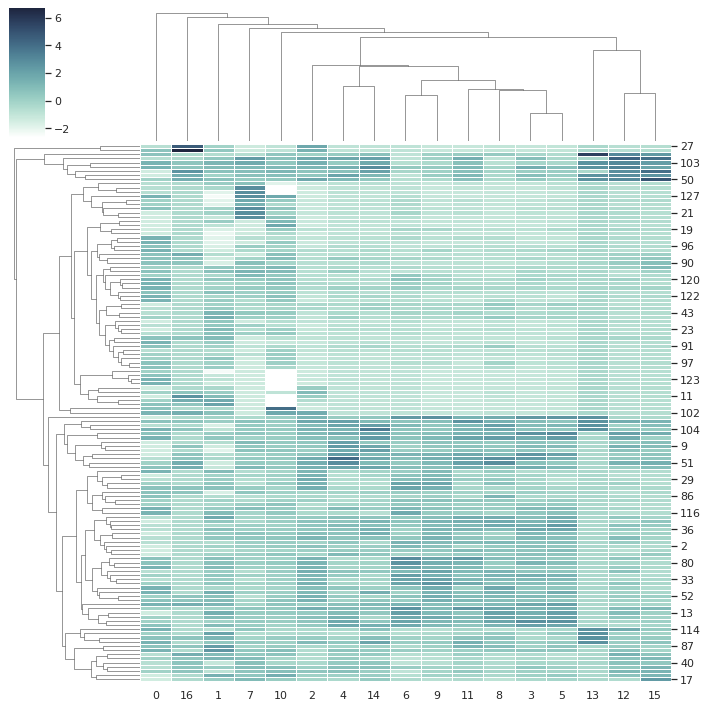

In [195]:
# To plot Dendrogram using clustermap
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(pca_scaled_data, cmap=cmap, linewidths=.5)

From above dendrogram, we can consider 2 clusters at minimum or 6 clusters at maximum. We will again cross-check the dendrogram using Ward's Method. Ward's method is an alternative to single-link clustering. This algorithm works for finding a partition with small sum of squares (to minimise the within-cluster-variance).

Method-2: Dendrogram Plotting using Ward's Method

Saving figure 04_Hier_Dendrogram


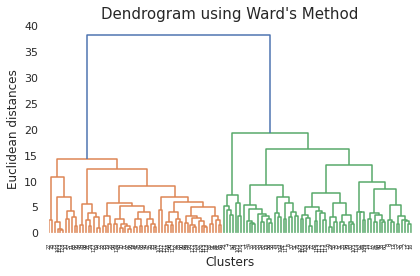

In [196]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
dendrogram = sch.dendrogram(sch.linkage(pca_scaled_data, method='ward'))
plt.title("Dendrogram using Ward's Method", fontsize=15)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Euclidean distances', fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
save_fig("04_Hier_Dendrogram")
plt.show()

We can see 2 prominent clusters here (orange, green). We will now follow the similar process of labelling data with cluster ids, then visualize the 4 clusters using various feature pairs, and finally we will export the results to a .csv file.

In [200]:
# To train the model using Heirarchical clustering
from sklearn.cluster import AgglomerativeClustering

hier_clust = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
Y_hc = hier_clust.fit_predict(pca_scaled_data)

In [201]:
# To check the labelled clusters
Y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [202]:
# To check the counts of cluster
pd.Series(hier_clust.labels_).value_counts()

0    67
1    62
dtype: int64

In [203]:
# save the cluster labels
data_hc = new_def_data.copy()
data_hc = data_hc.drop('KM_Clusters', axis=1)
data_hc['Hier_clusters'] = hier_clust.labels_
data_hc.head()

,Season,Player,Nation,Pos,Age,90s,Tkl,TklW,Def 3rd,Mid 3rd,...,Press Att 3rd,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Hier_clusters
0,2017,Mohamed Salah,eg EGY,FW,25,32.3,15,13,3,5,...,202,17,0,0,17,13,28,3,0,0
1,2017,Roberto Firmino,br BRA,FW,25,30.7,62,48,12,35,...,309,41,2,1,39,25,87,10,0,0
2,2017,Sadio Mané,sn SEN,FW,25,24.3,33,25,9,15,...,133,14,1,0,13,19,52,6,0,0
3,2017,Georginio Wijnaldum,nl NED,MF,26,26.5,38,30,16,18,...,72,22,2,0,20,42,80,28,0,0
4,2017,Jordan Henderson,eng ENG,MF,27,24.1,48,32,15,26,...,60,44,1,0,43,38,86,55,0,0


Saving figure 04_Hierar_cluster


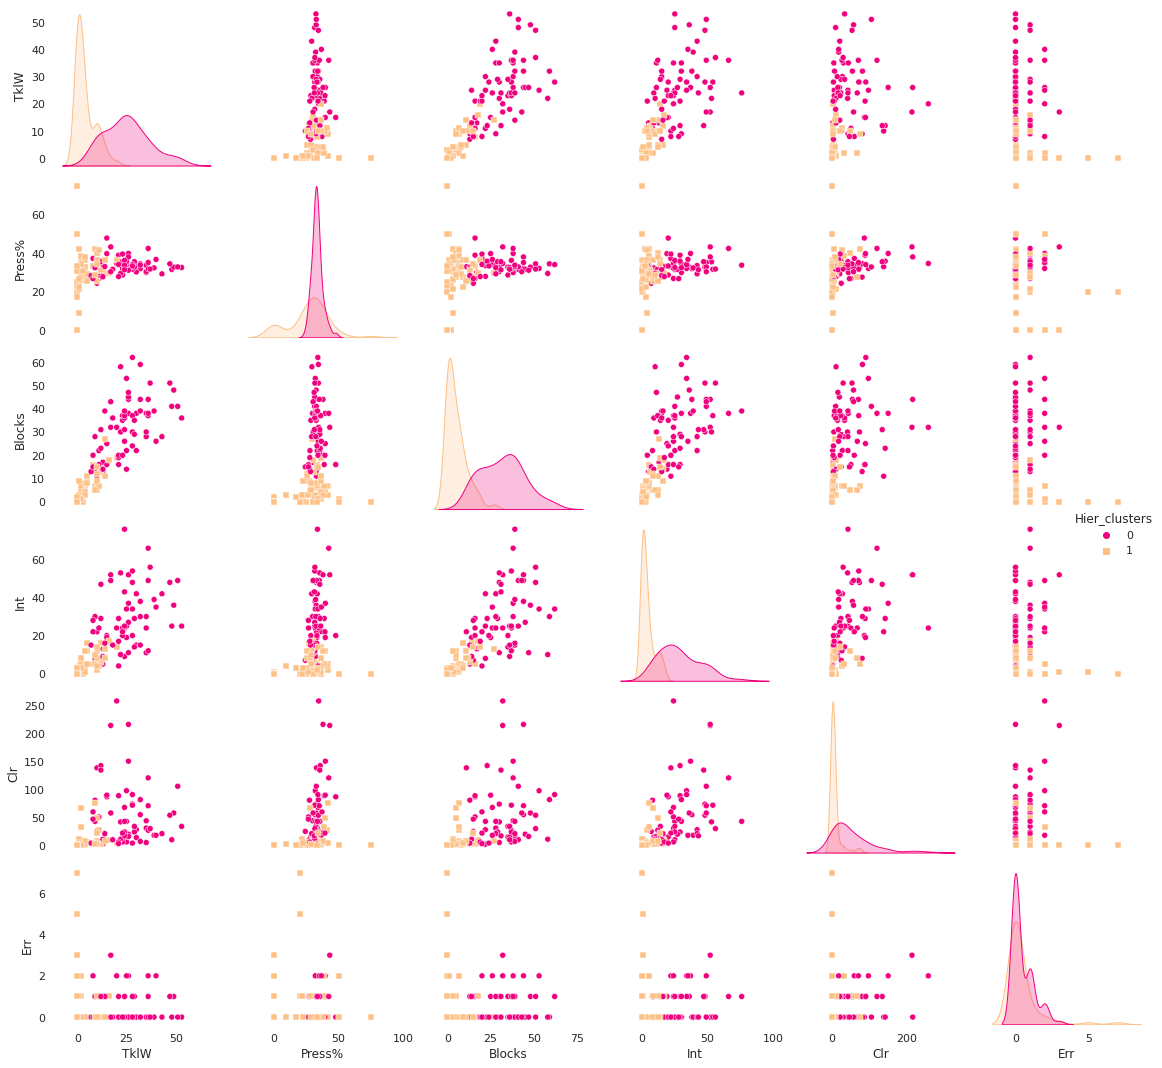

In [204]:
# To plot the clusterting distribution of all the important features
sns.pairplot(data=data_hc, x_vars=['TklW','Press%','Blocks','Int','Clr','Err'],
             y_vars=['TklW','Press%','Blocks','Int','Clr','Err'], hue='Hier_clusters', 
             palette='Accent_r', markers=['o','s'])

save_fig("04_Hierar_cluster")

Let us determine the common qualities that players share with each cluster in Hierarchical Clustering using the pairplot above:

Cluster 0 traits:
- Players in this cluster won the tackle in which tackler's team won the possession between 10 and 50 times each season
- Players in this cluster gain possession within 5 seconds of applying pressure between 25% and 50% of the time each season
- Players in this cluster blocks the ball between 20 and 65 of the times each season 
- Players in this cluster intercepts the ball between 10 and 75 of the times per season
- Players in this cluster makes the clearance of the ball between 0 and 220 times per season
- Players in this cluster makes the error that leads to a shot by an opponent 0 or 3 times per season

Cluster 1 traits:
- Players in this cluster won the tackle in which tackler's team won the possession between 0 and 20 times each season
- Players in this cluster gain possession within 5 seconds of applying pressure between 0% and 75% of the time each season
- Players in this cluster blocks the ball between 0 and 25 of the times each season 
- Players in this cluster intercepts the ball between 0 and 20 of the times per season
- Players in this cluster makes the clearance of the ball between 0 and 80 times per season
- Players in this cluster makes the error that leads to a shot by an opponent 0 or 7 times per season


In [205]:
# To export hierarchical clustering results
data_hc.to_csv('04_Hierchical_Results.csv', index=False)

# The End